## Part 2: Slidedeck of the dataset

### FordGobike dataset  was choosen for the analysis
There are 183,412 data trips for fordgobike in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are 9 numerical, and others are 2 datetime, 4 object type and 1 is boolean type.



## Overview of the analysis
The investigation was performed to study the effect of trip duration over age, users and gender.

In [1]:
#Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading the datasets using pandas as dataframes
df = pd.read_csv(r'C:/Users/Asus/Downloads/201902-fordgobike-tripdata.csv/201902-fordgobike-tripdata.csv')


In [3]:
# changing the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

### Distributional relationship of user age with trip duration

#### With the given data sets, ages between 20 t0 40 years are found to be more concentrated

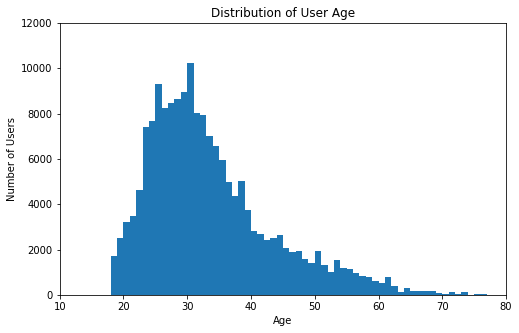

In [4]:
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

### Relationship of gender aspects with trip duration

#### In view with the number of users in trip duration, male dominates while on percentage female leads

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


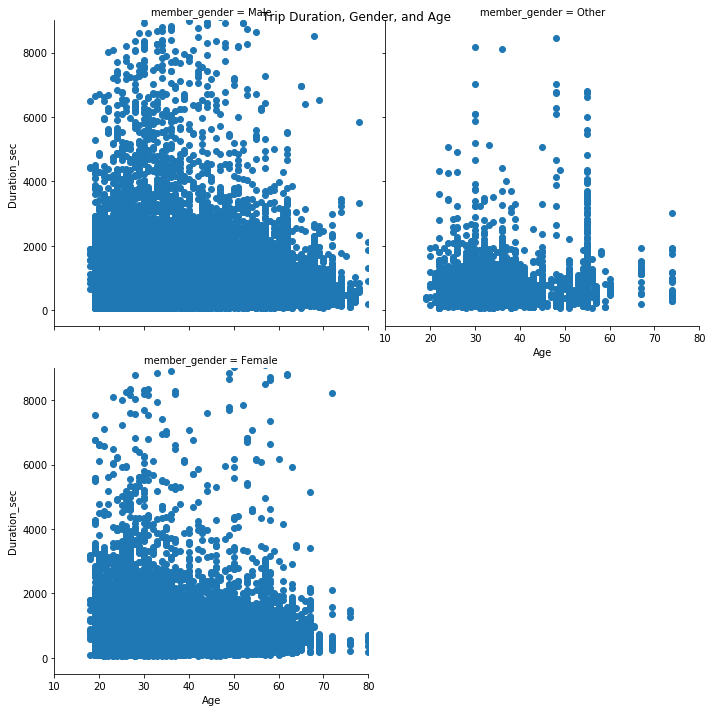

In [5]:
#Impact of age of various genders with the trip duration
df['age'] = (2019 - df['member_birth_year'])
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha= 1)


gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

### User type variation with trip duration

####  For subscribers the trip duration is higher than customer for older age.

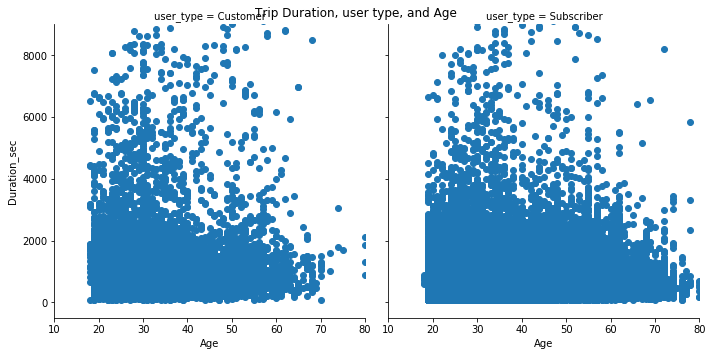

In [6]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_type.map(plt.scatter, 'age', 'duration_sec', alpha= 1)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
user_type.fig.suptitle('Trip Duration, user type, and Age')
plt.show()